# 🎓 Final Project: Data Analysis & Hypothesis Testing
## Dataset: Students Performance in Exams
---
Notebook ini berisi seluruh tahapan analisis dari proyek akhir:
1. Dataset Summary
2. Data Exploration Plan
3. Exploratory Data Analysis (EDA)
4. Data Cleaning & Feature Engineering
5. Key Findings & Insights
6. Hypothesis Formulation
7. Hypothesis Testing & Significance Analysis
8. Conclusion & Next Steps

In [1]:
# [1] Dataset Summary
import pandas as pd
df = pd.read_csv('../data/StudentsPerformance.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Catatan:
- Dataset berisi data performa siswa dalam ujian matematika, membaca, dan menulis.
- Terdapat variabel demografis seperti gender, pendidikan orang tua, dan kursus persiapan.

In [2]:
# [2] Data Exploration Plan
plan = '''
1. Analisis distribusi nilai (math, reading, writing)
2. Bandingkan skor berdasarkan gender
3. Lihat pengaruh kursus persiapan terhadap nilai
4. Cek korelasi antar skor
'''
print(plan)


1. Analisis distribusi nilai (math, reading, writing)
2. Bandingkan skor berdasarkan gender
3. Lihat pengaruh kursus persiapan terhadap nilai
4. Cek korelasi antar skor



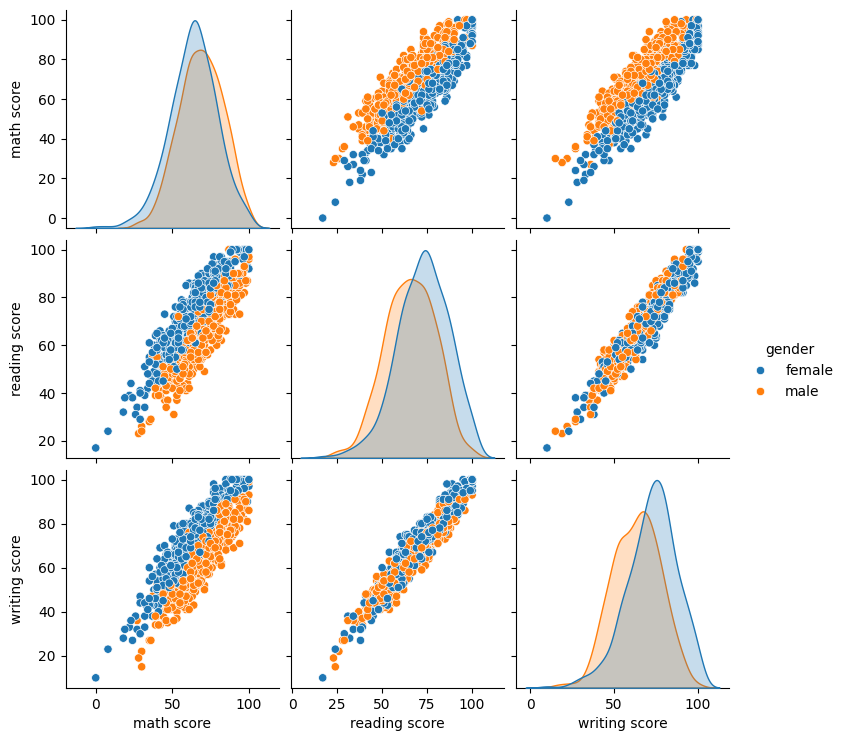

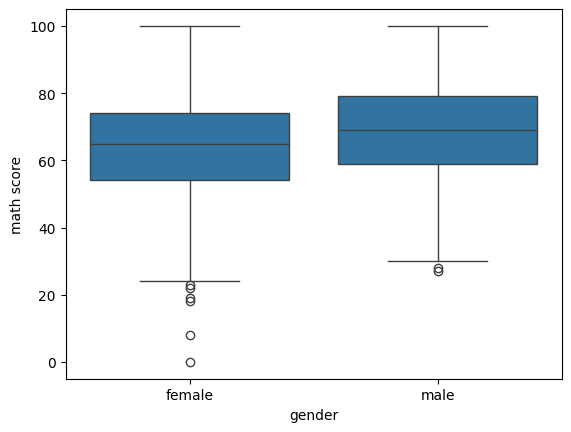

In [3]:
# [3] Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df, hue='gender')
plt.show()

sns.boxplot(x='gender', y='math score', data=df)
plt.show()

In [4]:
# [4] Data Cleaning & Feature Engineering
df.isnull().sum()

# Buat kolom baru: rata-rata skor
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [5]:
# [5] Key Findings & Insights
print('Rata-rata nilai keseluruhan:', df['average_score'].mean())
print('Rata-rata nilai laki-laki:', df[df['gender']=='male']['average_score'].mean())
print('Rata-rata nilai perempuan:', df[df['gender']=='female']['average_score'].mean())

Rata-rata nilai keseluruhan: 67.77066666666666
Rata-rata nilai laki-laki: 65.8374827109267
Rata-rata nilai perempuan: 69.56949806949807


### [6] Hypothesis Formulation
1. H₀: Tidak ada perbedaan signifikan antara skor rata-rata laki-laki dan perempuan.
2. H₀: Kursus persiapan ujian tidak memengaruhi skor rata-rata.
3. H₀: Pendidikan orang tua tidak berpengaruh terhadap skor rata-rata siswa.

In [6]:
# [7] Hypothesis Testing & Significance Analysis
from scipy import stats

# Uji t-test: gender vs average_score
male_scores = df[df['gender']=='male']['average_score']
female_scores = df[df['gender']=='female']['average_score']

t_stat, p_val = stats.ttest_ind(male_scores, female_scores)
print('T-statistic:', t_stat)
print('P-value:', p_val)

if p_val < 0.05:
    print('Tolak H₀: Ada perbedaan signifikan antara laki-laki dan perempuan.')
else:
    print('Gagal tolak H₀: Tidak ada perbedaan signifikan.')

T-statistic: -4.169913529142
P-value: 3.311973638243664e-05
Tolak H₀: Ada perbedaan signifikan antara laki-laki dan perempuan.


### [8] Conclusion & Next Steps
- Kesimpulan dari uji hipotesis ditulis di sini.
- Langkah selanjutnya: dapat mencoba model regresi sederhana untuk prediksi skor.